<a href="https://colab.research.google.com/github/Udhay707/Pytorch-GAN/blob/main/Numbers_recognition_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)
dataset

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 28.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 943kB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 7.97MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.37MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
test_dataset = MNIST(root='data/', train=False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Label 5


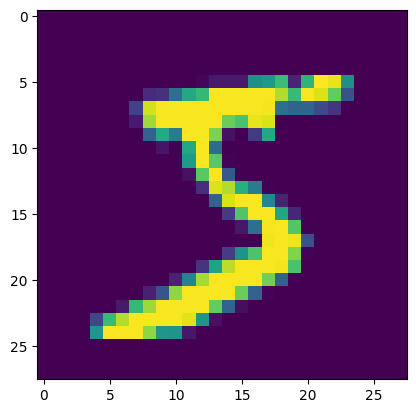

In [7]:
image, label = dataset[0]
plt.imshow(image)
print('Label', label)

Label: 3


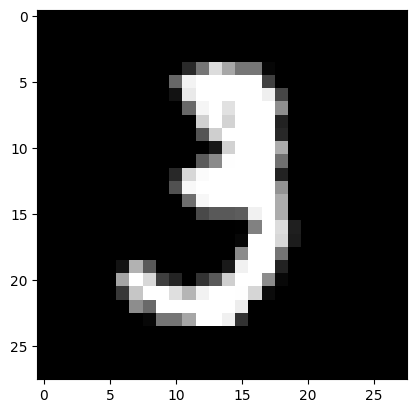

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms
dataset.transform = transforms.ToTensor()
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [10]:
img_tensor, label = dataset[0]
img_tensor.shape, label

(torch.Size([1, 28, 28]), 5)

In [11]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


Display a part of the image

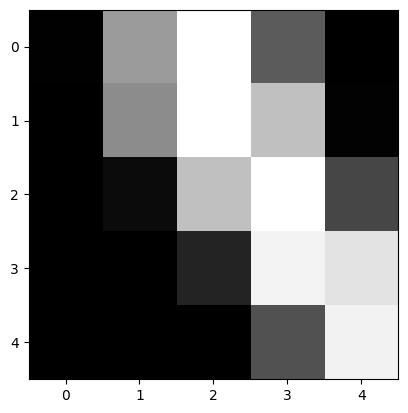

In [12]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 130

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
validation_dl = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn
input_size = 28*28
output_size = 10
model = nn.Linear(input_size, output_size)

In [16]:
model.weight, model.weight.shape

(Parameter containing:
 tensor([[ 0.0329,  0.0006, -0.0334,  ...,  0.0020, -0.0006, -0.0349],
         [ 0.0054, -0.0178, -0.0083,  ...,  0.0279, -0.0119, -0.0009],
         [-0.0113,  0.0094, -0.0322,  ...,  0.0115,  0.0009, -0.0060],
         ...,
         [ 0.0329, -0.0156,  0.0095,  ...,  0.0203,  0.0232,  0.0019],
         [ 0.0254,  0.0254,  0.0349,  ...,  0.0222, -0.0036, -0.0302],
         [ 0.0147, -0.0196,  0.0002,  ...,  0.0346, -0.0273,  0.0099]],
        requires_grad=True),
 torch.Size([10, 784]))

This is because we are predicting 10 outcomes with 784 input params, so W.t() will be in shape(10, 784) to predict each outcomes

In [17]:
model.bias, model.bias.shape

(Parameter containing:
 tensor([ 0.0125, -0.0016, -0.0063,  0.0198, -0.0026,  0.0251, -0.0067,  0.0222,
          0.0212, -0.0290], requires_grad=True),
 torch.Size([10]))

In [18]:
for images, labels in train_dl:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([2, 2, 5, 4, 2, 3, 3, 4, 3, 0, 3, 0, 1, 6, 9, 1, 0, 3, 1, 0, 1, 7, 9, 3,
        7, 2, 1, 9, 3, 3, 7, 4, 8, 8, 3, 0, 1, 4, 1, 2, 4, 7, 0, 1, 1, 0, 2, 8,
        1, 3, 9, 4, 7, 0, 6, 6, 2, 8, 2, 4, 2, 3, 4, 7, 6, 5, 4, 4, 1, 3, 4, 3,
        8, 7, 3, 2, 9, 2, 7, 8, 0, 8, 7, 3, 1, 0, 2, 7, 0, 7, 4, 2, 4, 2, 3, 7,
        9, 2, 3, 6, 4, 2, 3, 8, 3, 4, 4, 6, 4, 2, 8, 4, 2, 9, 6, 3, 0, 0, 6, 1,
        6, 7, 0, 2, 5, 1, 7, 4, 7, 3])
torch.Size([130, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3640x28 and 784x10)

This is because we have not fltten the data

In [19]:
class MnistModel(nn.Module):
  def __init__(self, input_size, num_classes):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self, x):
    xb = x.reshape(-1, 784)
    out = self.linear(xb)
    return out

In [20]:
nnModel = MnistModel(784, 10)
nnModel.linear.weight, nnModel.linear.weight.shape, nnModel.linear.bias

(Parameter containing:
 tensor([[ 0.0313, -0.0198, -0.0130,  ..., -0.0278,  0.0353, -0.0099],
         [-0.0244, -0.0314, -0.0141,  ...,  0.0215, -0.0352, -0.0066],
         [ 0.0309,  0.0276, -0.0237,  ...,  0.0301,  0.0295, -0.0357],
         ...,
         [-0.0015, -0.0124,  0.0324,  ...,  0.0198,  0.0071, -0.0008],
         [ 0.0314, -0.0199, -0.0085,  ...,  0.0078,  0.0097, -0.0289],
         [-0.0292,  0.0342, -0.0239,  ...,  0.0130, -0.0106,  0.0136]],
        requires_grad=True),
 torch.Size([10, 784]),
 Parameter containing:
 tensor([-0.0102,  0.0275,  0.0186, -0.0063,  0.0137, -0.0077, -0.0086,  0.0086,
          0.0071, -0.0051], requires_grad=True))

In [21]:
for images, labels in train_dl:
    outputs = nnModel(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([130, 10])
Sample outputs :
 tensor([[ 0.1605, -0.1773,  0.0044,  0.0392, -0.0675,  0.1760, -0.1813,  0.0917,
          0.2240, -0.1024],
        [-0.2895, -0.1759, -0.0236,  0.2529, -0.0455, -0.0313, -0.2702,  0.2626,
         -0.1584, -0.1480]])


In [22]:
from torch.functional import F
from torch.functional import F
probs = F.softmax(outputs, dim=1)
max_value, index = torch.max(probs, dim=1)#Provides the max prob in all dataset
print([f'predicted {x}, actual {y}' for x,y in zip(index, labels)])

['predicted 8, actual 2', 'predicted 7, actual 1', 'predicted 8, actual 8', 'predicted 5, actual 9', 'predicted 3, actual 0', 'predicted 2, actual 3', 'predicted 7, actual 8', 'predicted 3, actual 1', 'predicted 1, actual 2', 'predicted 3, actual 2', 'predicted 9, actual 9', 'predicted 3, actual 5', 'predicted 7, actual 1', 'predicted 9, actual 1', 'predicted 7, actual 7', 'predicted 3, actual 1', 'predicted 5, actual 5', 'predicted 8, actual 9', 'predicted 7, actual 2', 'predicted 8, actual 8', 'predicted 1, actual 4', 'predicted 2, actual 0', 'predicted 7, actual 6', 'predicted 9, actual 8', 'predicted 7, actual 8', 'predicted 8, actual 5', 'predicted 3, actual 3', 'predicted 3, actual 0', 'predicted 5, actual 9', 'predicted 7, actual 1', 'predicted 8, actual 3', 'predicted 8, actual 6', 'predicted 9, actual 3', 'predicted 5, actual 6', 'predicted 7, actual 2', 'predicted 7, actual 1', 'predicted 3, actual 5', 'predicted 8, actual 6', 'predicted 8, actual 3', 'predicted 8, actual 5',

As the above are just random weights, the predictions are wrong mostly

In [23]:
def accuracy(prediction, label):
    _, preds = torch.max(prediction, dim=1)
    return torch.sum(preds == label) / len(label)

In [24]:
probs.size(), labels.size()

(torch.Size([130, 10]), torch.Size([130]))

In [25]:
accuracy(probs, labels)

tensor(0.1154)

In [26]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2993, grad_fn=<NllLossBackward0>)


In [26]:
class MnistModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, xb):
        xb = xb.reshape(-1, 784) #-1 tells numpy to take whatever should fit in here its the batch size
        out = self.linear(xb)
        return out

    def training(self, batch):
      images, labels = batch
      out = self(images)
      loss = F.cross_entropy(out, labels)
      acc = self.accuracy(out, labels)
      return {'val_loss': loss, 'val_accuracy': acc}

    def accuracy(self, out, labels):
       _, preds = torch.max(out, dim=1)
       return torch.sum(preds == labels) / len(labels)

    def validation_steps(self, batch):

